# Case Study on Probability

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset

In [2]:
#reading the dataset
data=pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.shape

(8124, 23)

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
#dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
#checking datatypes of variables
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

# Preprocessing

In [7]:
#checking null values
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

But given that '?' denotes missing values in stalk root.So we have to find them.

In [8]:
#finding missing values in stalk-root
data['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

There are 2480 missing values,so we need to find it.

In [9]:
#replacing '?' with nan 
data.replace({'?': np.nan}, inplace=True)

In [10]:
#checking missing values again
data.isna().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [11]:
#filling missing values with mode
sr=['stalk-root']
data[sr]=data[sr].fillna(data.mode().iloc[0])

In [12]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
for column in data.columns:
    data[column]=label_en.fit_transform(data[column])

In [14]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [15]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   4
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

The column 'veil-type' includes same value in all rows and not contributing to our model,so we can drop that column.

In [16]:
#dropping 'veil-type'
data=data.drop(["veil-type"],axis=1)

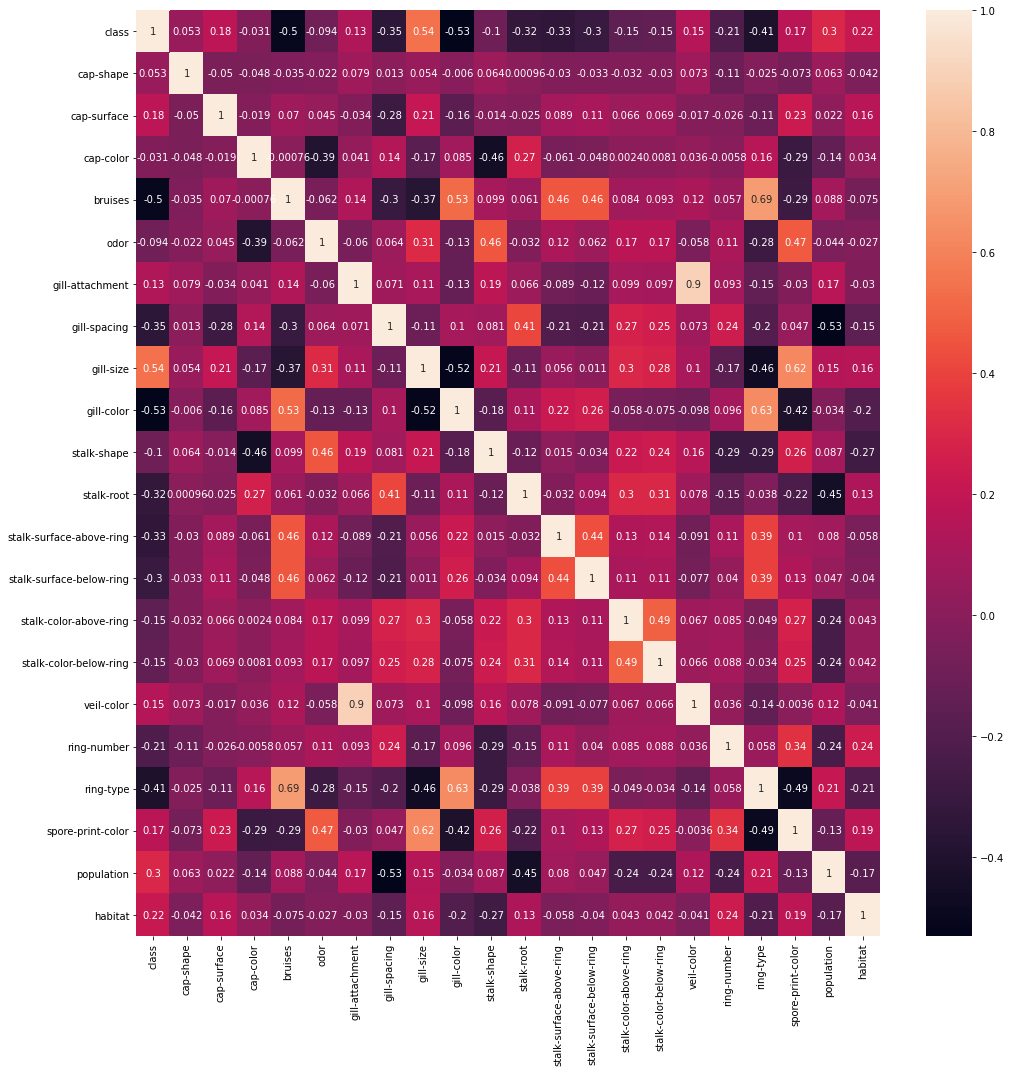

In [17]:
#Heatmap for the dataset
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)
plt.tight_layout()
plt.show()

There is high positive correlation between gill-attachement and veil-color.

There is high negative correlation between gill-spacing and population.

There is high negative correlation between gill-color and class.

## Splitting the dataset

In [18]:
x= data.drop(['class'], axis=1)
y = data['class']

In [19]:
#importing train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.20)

# Different Classification Methods

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(1,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [22]:
acc_values

[0.9993846153846154,
 0.9993846153846154,
 0.9981538461538462,
 0.9969230769230769,
 0.9950769230769231,
 0.9975384615384615,
 0.9963076923076923,
 0.9956923076923077,
 0.9956923076923077,
 0.9950769230769231,
 0.9950769230769231,
 0.9944615384615385,
 0.9938461538461538,
 0.9938461538461538]

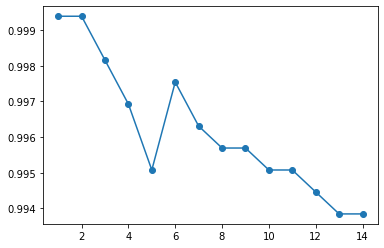

In [23]:
# plotting graph to find k value
plt.plot(neighbors,acc_values,'o-')

In [24]:
#so we get k=2
#now we create model and find all valuesclassifier= KNeighborsClassifier(n_neighbors=2,metric="minkowski")
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [25]:
print("Accuracy_score : ",accuracy_score(y_test,y_pred))
print("Precision_score : ",precision_score(y_test,y_pred))
print("recall_score : ",recall_score(y_test,y_pred))
print("f1_score : ",f1_score(y_test,y_pred))

Accuracy_score :  0.9938461538461538
Precision_score :  0.9948717948717949
recall_score :  0.9923273657289002
f1_score :  0.9935979513444302


# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [27]:
print("Accuracy_score : ",accuracy_score(y_test,y_pred))
print("Precision_score : ",precision_score(y_test,y_pred))
print("recall_score : ",recall_score(y_test,y_pred))
print("f1_score : ",f1_score(y_test,y_pred))

Accuracy_score :  0.9538461538461539
Precision_score :  0.9491740787801779
recall_score :  0.9552429667519181
f1_score :  0.9521988527724665


# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [29]:
print("Accuracy_score : ",accuracy_score(y_test,y_pred))
print("Precision_score : ",precision_score(y_test,y_pred))
print("recall_score : ",recall_score(y_test,y_pred))
print("f1_score : ",f1_score(y_test,y_pred))

Accuracy_score :  1.0
Precision_score :  1.0
recall_score :  1.0
f1_score :  1.0


# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [31]:
print("Accuracy_score : ",accuracy_score(y_test,y_pred))
print("Precision_score : ",precision_score(y_test,y_pred))
print("recall_score : ",recall_score(y_test,y_pred))
print("f1_score : ",f1_score(y_test,y_pred))

Accuracy_score :  1.0
Precision_score :  1.0
recall_score :  1.0
f1_score :  1.0


# SVM

## Linear Kernel

In [32]:
from sklearn.svm import SVC
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [33]:
print("Accuracy_score : ",accuracy_score(y_test,y_pred))
print("Precision_score : ",precision_score(y_test,y_pred))
print("recall_score : ",recall_score(y_test,y_pred))
print("f1_score : ",f1_score(y_test,y_pred))

Accuracy_score :  1.0
Precision_score :  1.0
recall_score :  1.0
f1_score :  1.0


## Polynomial

In [34]:
from sklearn.svm import SVC
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [35]:
print("Accuracy_score : ",accuracy_score(y_test,y_pred))
print("Precision_score : ",precision_score(y_test,y_pred))
print("recall_score : ",recall_score(y_test,y_pred))
print("f1_score : ",f1_score(y_test,y_pred))

Accuracy_score :  1.0
Precision_score :  1.0
recall_score :  1.0
f1_score :  1.0


## Radial

In [36]:
from sklearn.svm import SVC
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [37]:
print("Accuracy_score : ",accuracy_score(y_test,y_pred))
print("Precision_score : ",precision_score(y_test,y_pred))
print("recall_score : ",recall_score(y_test,y_pred))
print("f1_score : ",f1_score(y_test,y_pred))

Accuracy_score :  0.9932307692307693
Precision_score :  0.9974193548387097
recall_score :  0.9884910485933504
f1_score :  0.9929351316634554


# Naïve Bayes’ Classifier

## Gaussian Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
naive_b= GaussianNB()
naive_b.fit(x_train, y_train)
y_pred_nb = naive_b.predict(x_test)

In [39]:
print("Accuracy_score : ",accuracy_score(y_test,y_pred))

Accuracy_score :  0.9932307692307693


In [40]:
print(confusion_matrix(y_test,y_pred))

[[841   2]
 [  9 773]]


## Bernoulli Naive Bayes

In [41]:
from sklearn.naive_bayes import BernoulliNB
naive_bs=BernoulliNB()
naive_bs.fit(x_train, y_train)
y_pred_nbs=naive_bs.predict(x_test)

In [42]:
print("Accuracy_score : ",accuracy_score(y_test,y_pred))

Accuracy_score :  0.9932307692307693


In [43]:
print(confusion_matrix(y_test,y_pred))

[[841   2]
 [  9 773]]
